- svm은 실제로 분류작업에 많이 사용된다.
- 가장 큰 폭(margin)을 가진 경계를 구하는 것이 svm알고리즘이다.

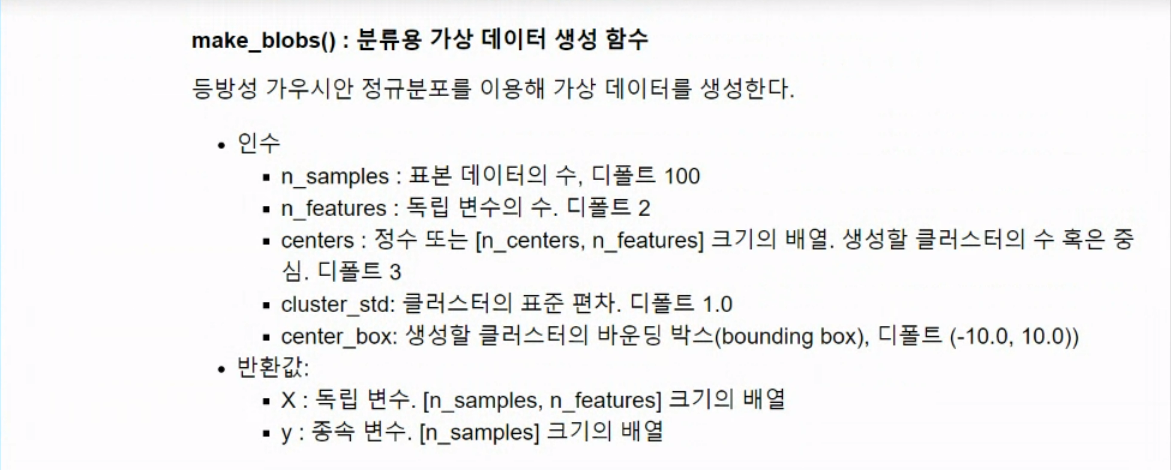
- 중요한 것은 반환값이다.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import pandas as pd

In [2]:
# make_blobs => 클러스트용 데이터를 생성하기 위한 함수, 분류에 사용가능 // 분류 또는 가상데이터를 만들 수 있는 함수
# centers=2 => 분류할 중심점을 두개로 설정
# n_samples=50, centers=2 => 50행 2열이 만들어짐
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4) 
y = 2 * y - 1  # 1아니면 -1이 나올 것이다.

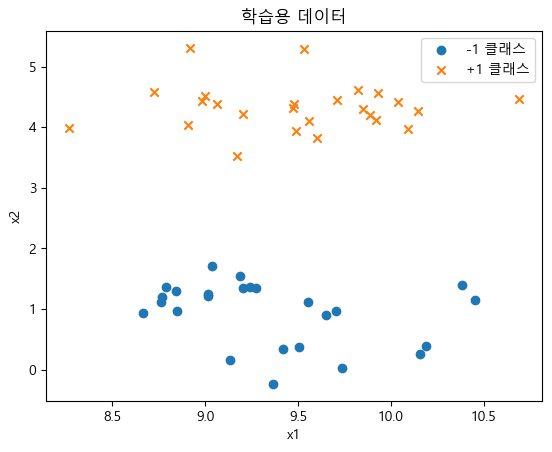

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스") # X[y == -1, 0] => x에 대한 독립변수에서 y값이 -1인 값을 추출
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

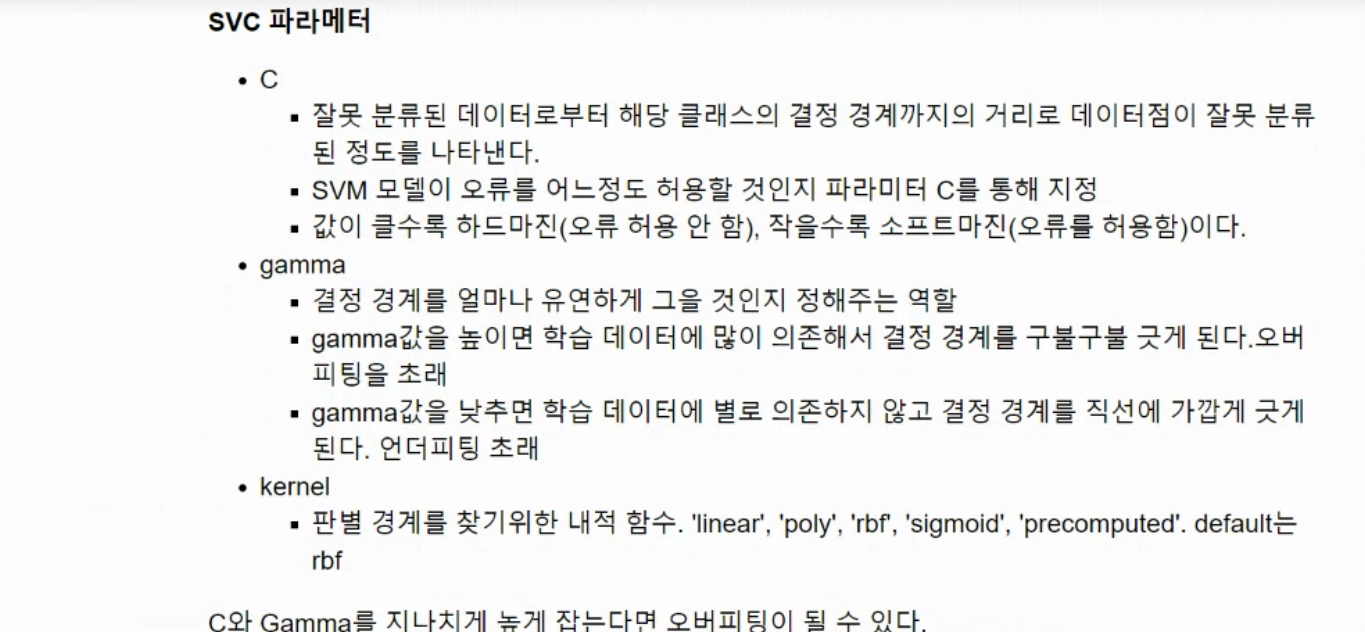

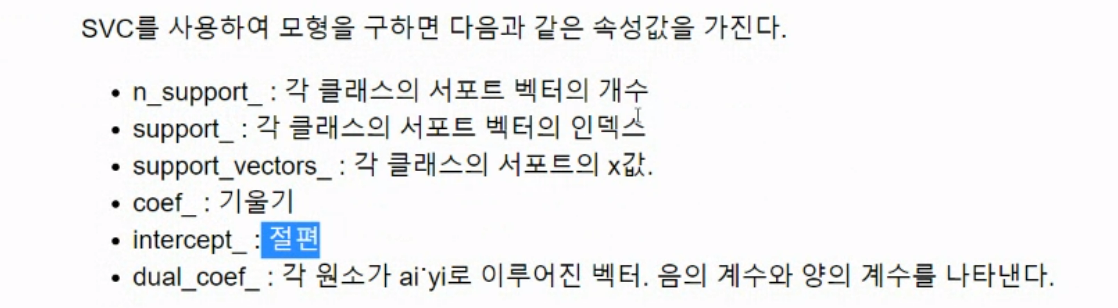
- dual_coef에 ai.yi는 ai*yi이다

In [4]:
# 슬랙변수(c) : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.
# 커널(kernel) : 판별 경계를 찾기 위한 내적 함수
model = SVC(kernel='linear', C=1e10).fit(X, y)
model

SVC(C=10000000000.0, kernel='linear')

In [5]:
model.n_support_

array([1, 1])

In [6]:
model.support_ # support vector가 42번 인덱스의 위치

array([42,  1])

In [7]:
model.support_vectors_ # 42번 인덱스에 가보면 이 데이터가 있다.

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [8]:
y[model.support_] # 경계값 위치 찾는 것

array([-1,  1])

In [9]:
model.coef_ # 기울기

array([[0.08171082, 1.10091404]])

In [10]:
model.intercept_ # 절편

array([-3.62995208])

In [11]:
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [12]:
# # 여기는 ndenumerate(a): 에 대한 예시
# a = np.array([[1,2],[3,4,],[5,6]])
# for (x,y), value in np.ndenumerate(a):
#     print((x,y), value)
#     # x, y변수에는 인덱스 값이 저장되고 , 벨류에는 실제 값이 저장이 된다.

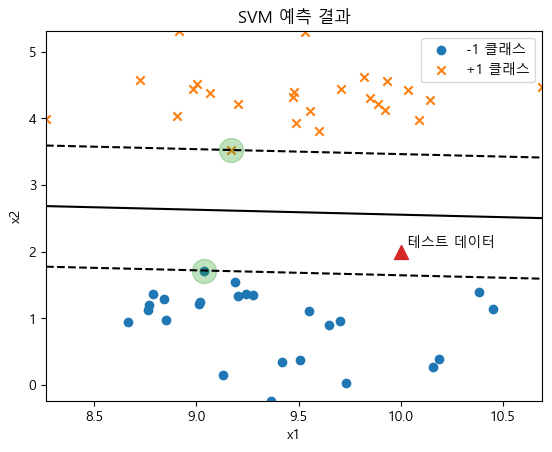

In [13]:
# 차트를 그려서 경계선 그리는 작업 (시각적으로 확인하기 위함)
xmin = X[:, 0].min()
xmax = X[:, 0].max()

ymin = X[:, 1].min()
ymax = X[:, 1].max()

xx = np.linspace(xmin, xmax, 10) 
# linspace(xmin, xmax, 10) => xmin과 xmax 사이에서 일정한 간격으로 10개의 데이터를 만들겠다는 의미이다.
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1): 
    
# decision_function(): 판별함수라고 불린다.// 모든 데이터에 대해 판별함수값을 계산
# 판별함수값: 판별 평면으로부터의 거리.
# 판별함수값이 음수이면 0인 클래스, 양수이면 1인 클래스로 판별.
# 즉 0이 클래스 판별 기준값이 된다.

 x1 = val
 x2 = X2[i, j]
 p = model.decision_function([[x1, x2]]) # 판별함수를 이용해서 [x1, x2] 이게 음의 경계선 데이터인지 양의 경계선 데이터인지 판별
 Z[i, j] = p[0] 
    
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
# support_vectors_[:, 0] => 음의 경계, [:,1] => 양의 경계를 표시함
x_new = [10, 2] # '테스트'라고 되어있는 것을 만드는 작업
plt.scatter(x_new[0], x_new[1], marker='^', s=100) 

plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.show()
# 위쪽의 점선은 양의 경계선, 아래쪽의 점선은 음의 경계선, 초록색 원은 support vector

In [14]:
x_new = [10, 2]
model.decision_function([x_new])
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

## 서포트 벡터머신 예제 2 (아이리스 데이터)
- 커널 인수 kernel과 슬랙변수 가중치 인수 C는 각각 linear, 1e10으로 설정


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris # 로드계열 이니깐 dict계열이다.
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()


In [16]:

X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3)
svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [17]:
X_data.shape

(100, 2)

In [18]:
y = iris.target[(iris.target == 0)| (iris.target == 1)]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X_data, y, test_size = 0.3, random_state = 42)

In [20]:
pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)

array([[17,  0],
       [ 0, 13]], dtype=int64)

- 위의 조건에서 kernel="linear"로 유지한채 C값만 [0.01, 0.1, 1, 10, 100]으로 변화를 주며
결과를 살펴보니 C값이 높아지면 Slack 변수로 줄 수 있는 값이 줄어들어 서포트 벡터의 수가
줄어든다. 반대로 C값을 낮추어 줄수록 Slack 변수가 갖는 값이 크게 되어 서포트 벡터는
많아지며 마진이 줄어든다.

- Slack 변수=> 선형적으로 분류를 할 수 없는 경우에 분류를 위해 오차를 허용해야 하는데, 이때 규제(constraint)를 완화하여 오차를 허용할 때 사용하는 변수다.

C:\project\ai_source\AI_01\venv\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
C:\project\ai_source\AI_01\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


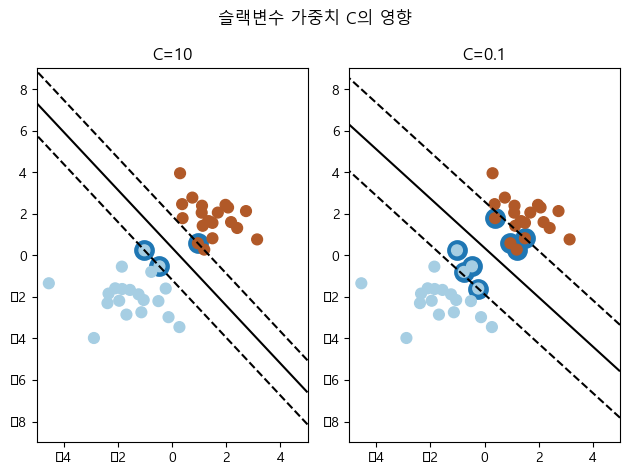

In [21]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20
plotnum = 1

for name, penalty in (('C=10', 10), ('C=0.1', 0.1)): # penalty => 슬랙변수 C
 clf = SVC(kernel='linear', C=penalty).fit(X, Y)
 xx = np.linspace(-5, 5)
 x_jin = -5
 x_jax = 5
 y_jin = -9
 y_jax = 9
 XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j] # mgrid 앞의 메쉬그리드와 같다.
 levels = [-1, 0, 1]
 linestyles = ['dashed', 'solid', 'dashed']
 Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) 
 Z = Z.reshape(XX.shape)

 plt.subplot(1, 2, plotnum)
 plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
 plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    
 plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
 plt.xlim(x_jin, x_jax)
 plt.ylim(y_jin, y_jax)
 plt.title(name)
    
 plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()
# 여기서 소프트 마진은 0.1이다. 

## 서포트 벡터 머신 예제 3 - 얼굴인식
-  얼굴 이미지 인식
- 총 40명이 각각 10장의 조금씩 다른 표정이나 모습으로 찍은 이미지 데이터이다.

In [22]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces() # fetch  계열 => 인터넷을 통해서 외부의 데이터를 가져온다.// dict구조이다.


In [23]:
faces.keys()
# 머신러닝이 되었건 딥러닝이 되었건 학습 데이터를 사용할 때는 반드시 2차원 데이터라고 해도 1차원구조로 변환시켜서 사용해야 한다.
# numpy 배열의 reshape()로 2차원을 1차원으로 변환하자

dict_keys(['data', 'images', 'target', 'DESCR'])

In [24]:
faces.data.shape # 이미지가 컬러일 때는 (400,4096,3) 이라고 나온다. 3 => RGB// 아무것도 없으면 단색이다.

(400, 4096)

In [25]:
faces.images.shape # 64*64 구조

(400, 64, 64)

In [26]:
faces.target # => 0부터 39까지 있다는 말은 40명의 데이터를 가져왔다 이 말이다.

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [27]:
faces.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [28]:
faces.data[0] # 0과 1사이인 것을 볼 수 있다. => minmax스케일링을 한 것으로 볼 수 있다.

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

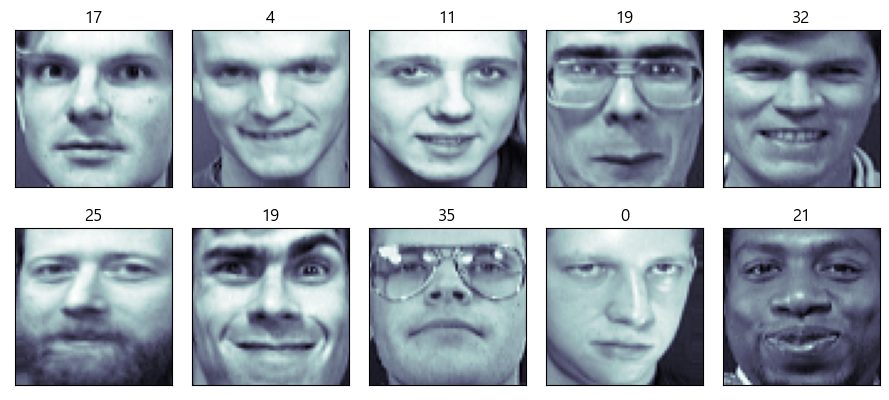

In [29]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5)) # figsize 직접 사이즈를 정해서 저장한다. 
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M) # 10개정도 저장하자.
for i in range(N):
 for j in range(M): # 10번 반복
     k = klist[i * M + j]
     ax = fig.add_subplot(N, M, i * M + j + 1) # 2행 5열에서 몇 번째 위치인가 라는 의미
     ax.imshow(faces.images[k], cmap=plt.cm.bone) # imshow 화면에 보여줌
     ax.grid(False)
     ax.xaxis.set_ticks([])
     ax.yaxis.set_ticks([])
     plt.title(faces.target[k])
plt.tight_layout()
plt.show()

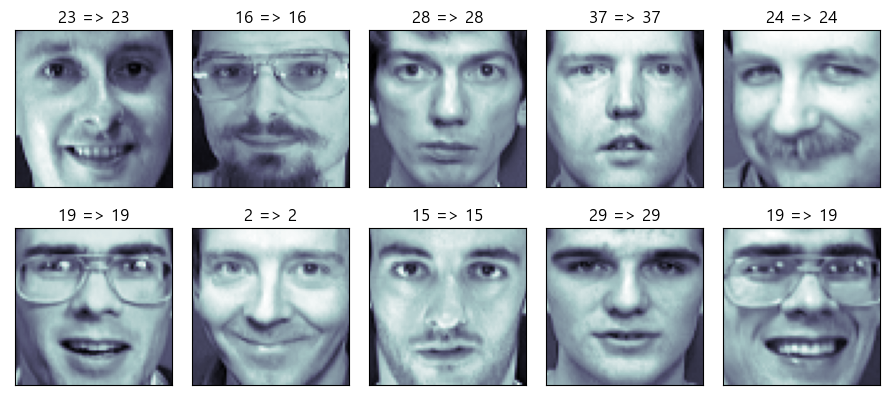

In [30]:
# 랜덤하게 뽑은 이미지

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, 
random_state=0)
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
 for j in range(M):
     k = klist[i * M + j]
     ax = fig.add_subplot(N, M, i * M + j + 1)
     ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
     ax.grid(False)
     ax.xaxis.set_ticks([])
     ax.yaxis.set_ticks([])
    
    #  # 앞의 %d는 실제 이미지 뒤의 %d는 예측한 이미지이다. 
     plt.title("%d => %d" %
         (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [31]:
# 랜덤하게 뽑은 이미지의 예측

from sklearn.metrics import classification_report, accuracy_score
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

## 서포트 벡터 머신 실습예제 -4 
- 비만도 테스트

In [33]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [35]:
tbl = pd.read_csv("bmi.csv")
tbl

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [ ]:
# sc = MinMaxScaler()
# wh = sc.fit_transform(tbl.iloc[:,:-1])
# 여기는 minmaxscaler를 한 곳임

In [38]:
# minmax로 해도 되지만 조건이 붙어 있으므로
label = tbl['label']
w = tbl['weight']/ 100 # 최대 100kg라고 했음
h = tbl['height']/200 # 최대 2미터 라고 함
wh = pd.concat([w,h], axis = 1)
wh

,weight,height
0,0.62,0.710
1,0.73,0.710
2,0.61,0.885
3,0.48,0.935
4,0.60,0.765
...,...,...
19995,0.58,0.610
19996,0.69,0.965
19997,0.37,0.965
19998,0.51,0.975


In [39]:
data_train, data_test,label_train,label_test = train_test_split(wh, label, test_size = 0.25, random_state = 1)

In [40]:
clf = svm.SVC()
clf.fit(data_train, label_train)

SVC()

In [41]:
predict = clf.predict(data_test)
predict

array(['thin', 'thin', 'fat', ..., 'fat', 'fat', 'fat'], dtype=object)

In [43]:
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test,predict)
print('정답률=', ac_score)
print('리포트 = \n', cl_report)

정답률= 0.9968
리포트 = 
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1870
      normal       0.99      1.00      0.99      1560
        thin       1.00      1.00      1.00      1570

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



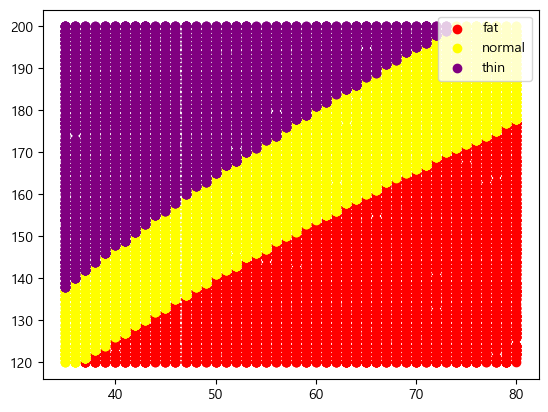

In [44]:


# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
 b = tbl.loc[lbl]
 ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend() 
plt.savefig("bmi-test.png")
plt.show()